# Logistic Regression Coding Implementation

In this homework, you need to fill the TODOs in the provided code. 

We have provided with you the code for loading the dataset, splitting it into training and testing sets. You will need to perform logistic regression on the training data (using new_train_data, train_labels) and evaluate on the X_test data (that is, compute the accuracy using predicted result vs test_labels). You will also visualize the result.

You are allowed to use existing machine learning package, such as sklearn.

For submission, you need to submit the completed ipynb file and also report the accuracy & visualization result in the homework pdf file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============= Data Preparation. DO NOT change the code below =============
train_data = np.load(file="train_data.npy")
train_labels = np.load(file="train_labels.npy")
test_data = np.load(file="test_data.npy")
test_labels = np.load(file="test_labels.npy")

def calculate_symmetry(n):
    sym = np.array(n)
    sym = sym.reshape(16, 16)

    for i in range(0, 16):
        sym[i] = np.flip(sym[i])

    sym = sym.reshape(
        256,
    )

    return -np.linalg.norm(n - sym, 1)

def calculate_intensity(n):
    return np.mean(n) * n.shape[0]

def get_data(orig, new):
    for i in range(0, orig.shape[0]):
        new[i][0] = calculate_symmetry(orig[i])
        new[i][1] = calculate_intensity(orig[i])

    return new


new_train_data = np.zeros((train_data.shape[0], 2))
new_train_data = get_data(train_data, new_train_data)

new_test_data = np.zeros((test_data.shape[0], 2))
new_test_data = get_data(test_data, new_test_data)

In [2]:
# TODO: Implement Logestic Regression and Predict on Test Dataset.
# You can use package like sklearn.linear_model.LinearRegression
from sklearn.linear_model import LogisticRegression
# ===== Training Logistic Regression using sklearn =====
model = LogisticRegression().fit(new_train_data, train_labels)
prediction = model.predict(X=new_test_data)
# ============================================================

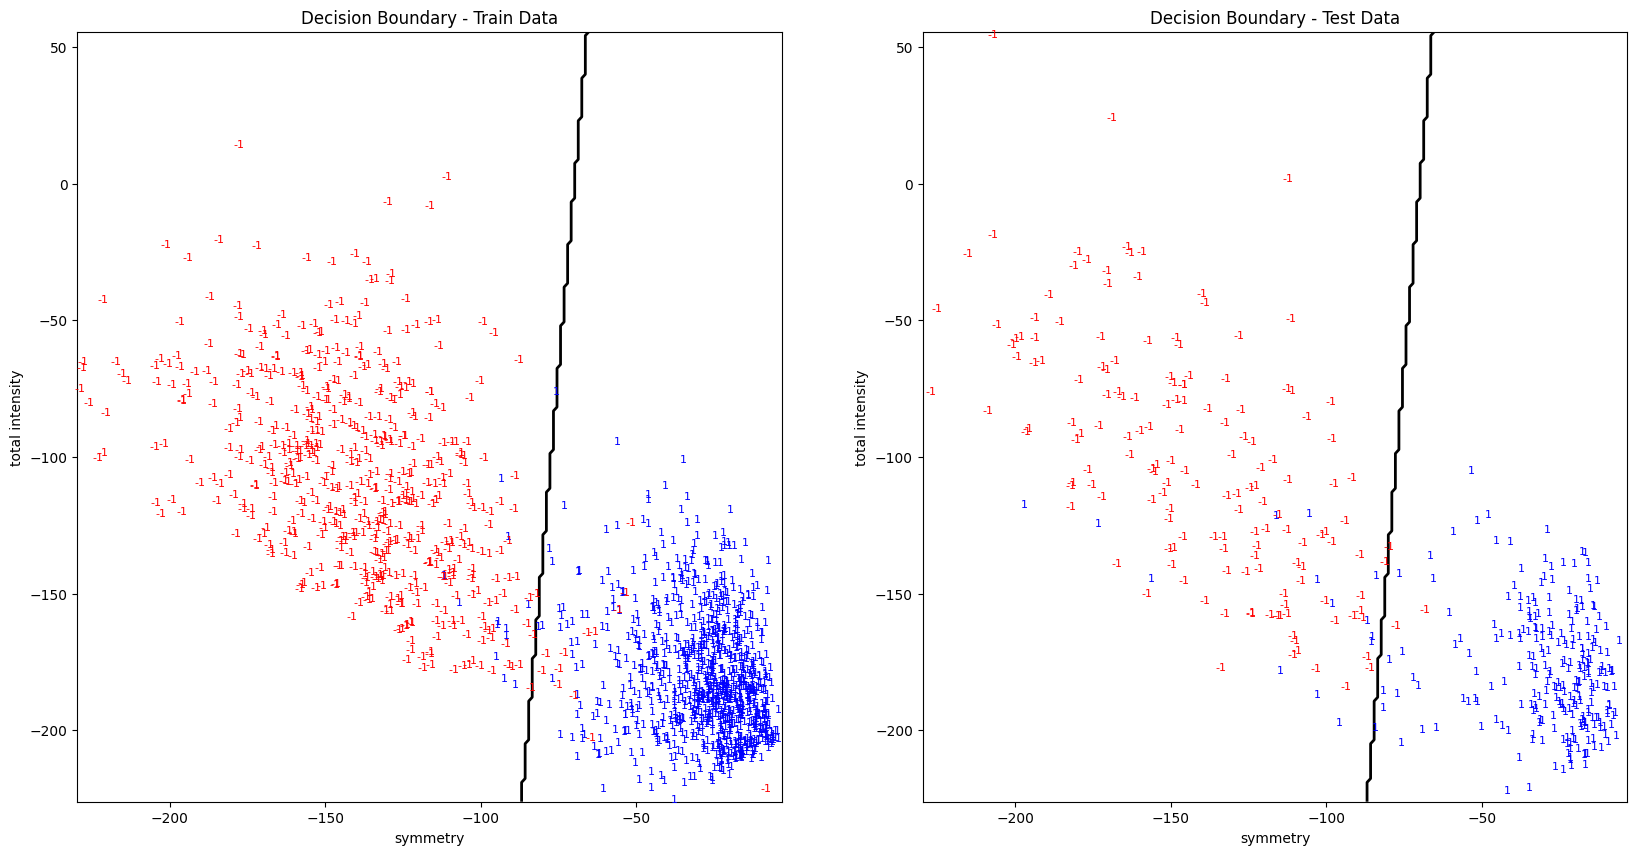

In [3]:
def plot_with_boundary(X_train, y_train, X_test, y_test, model):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    x1_min, x1_max = min(X_train[:,0].min(), X_test[:,0].min()) - 1, max(X_train[:,0].max(), X_test[:,0].max()) + 1
    x2_min, x2_max = min(X_train[:,1].min(), X_test[:,1].min()) - 1, max(X_train[:,1].max(), X_test[:,1].max()) + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200), np.linspace(x2_min, x2_max, 200))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict(grid).reshape(xx1.shape)

    # Training plot
    ax[0].contour(xx1, xx2, probs, levels=[0], linewidths=2, colors='black')
    for i in range(X_train.shape[0]):
        color = 'blue' if y_train[i] == 1 else 'red'
        ax[0].text(X_train[i,0], X_train[i,1], str(y_train[i]), fontsize=8, ha='center', va='center', color=color)
    ax[0].set_xlabel("symmetry")
    ax[0].set_ylabel("total intensity")
    ax[0].set_title("Decision Boundary - Train Data")
    ax[0].set_xlim(x1_min, x1_max)
    ax[0].set_ylim(x2_min, x2_max)

    # Testing plot
    ax[1].contour(xx1, xx2, probs, levels=[0], linewidths=2, colors='black')
    for i in range(X_test.shape[0]):
        color = 'blue' if y_test[i] == 1 else 'red'
        ax[1].text(X_test[i,0], X_test[i,1], str(y_test[i]), fontsize=8, ha='center', va='center', color=color)
    ax[1].set_xlabel("symmetry")
    ax[1].set_ylabel("total intensity")
    ax[1].set_title("Decision Boundary - Test Data")
    ax[1].set_xlim(x1_min, x1_max)
    ax[1].set_ylim(x2_min, x2_max)

    plt.show()

# TODO: Visualization =======================================
# You may use the provided visualization function
# Or you can implement one yourself
plot_with_boundary(new_train_data, train_labels, new_test_data, test_labels, model)
# ============================================================

In [4]:
from sklearn.metrics import accuracy_score
# TODO: Report Acc ===========================================
# You may use package such as sklearn.metrics.accuracy_score
accuracy_score(y_true=test_labels, y_pred=prediction)

# ============================================================

0.9622641509433962